# EDA

En este archivos nos enfocaremos en hacer un análisis exploratorio de los datasets que limpiamos con con el ETL. Vamos a ender a fondo la distribución de los datos, buscar patrones interesantes y conseguir información importante para el desarrollo de modelos de recomendación.

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Cargamos los datos

In [3]:
steam_games = pd.read_csv('../datasets/steam_games.csv')
user_reviews = pd.read_csv('../datasets/user_reviews.csv')
users_items = pd.read_parquet('../datasets/users_items.parquet')

In [4]:
steam_games.describe()

,item_id,año
count,2.746100e+04,27461.000000
mean,4.416237e+05,2014.866283
std,1.858999e+05,3.273617
min,1.000000e+01,1983.000000
25%,3.172010e+05,2014.000000
50%,4.371200e+05,2016.000000
75%,5.875900e+05,2017.000000
max,2.028850e+06,2021.000000


In [30]:
user_reviews.describe(include='all')

,user_id,posted,item_id,recommend,sentiment_analysis
count,59305,59305,59305.000000,59305,59305.000000
unique,25458,1906,NaN,2,NaN
top,76561198094665607,"Posted June 21, 2014.",NaN,True,NaN
freq,20,225,NaN,52473,NaN
mean,NaN,NaN,169935.176511,NaN,1.394840
std,NaN,NaN,132029.464174,NaN,0.638463
min,NaN,NaN,10.000000,NaN,0.000000
25%,NaN,NaN,8930.000000,NaN,1.000000
50%,NaN,NaN,218230.000000,NaN,1.000000
75%,NaN,NaN,261760.000000,NaN,2.000000


In [6]:
users_items.describe()

,horas
count,3.246375e+06
mean,2.590567e+01
std,1.119564e+02
min,1.666667e-02
25%,7.333333e-01
50%,3.416667e+00
75%,1.346667e+01
max,1.071288e+04


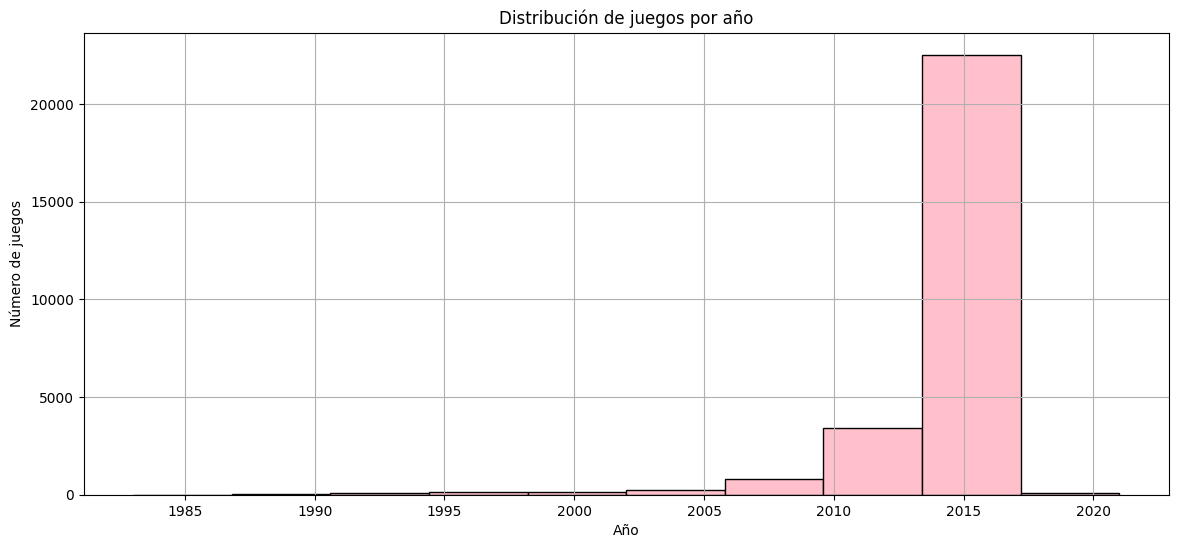

In [34]:
# Histograma de la distribución de juegos por año

plt.figure(figsize=(14, 6))
plt.hist(steam_games['año'], edgecolor='black', color='pink')
plt.title('Distribución de juegos por año')
plt.xlabel('Año')
plt.ylabel('Número de juegos')
plt.grid(True)
plt.show()

Vemos que los años con mayores lanzamientos fueron 2015 y 2016

Vamos a proceder a ver como es el balance de recomendaciones positivas y negativa

In [32]:
# Calcula el conteo y porcentaje de recomendaciones
recomendaciones = user_reviews['recommend'].value_counts()
porcentaje_recomendaciones = (recomendaciones / len(user_reviews)) * 100

# Crea un nuevo DataFrame con el conteo y porcentaje
recomendaciones_final = pd.DataFrame({
    'Conteo': recomendaciones,
    'Porcentaje': porcentaje_recomendaciones.round(2).astype(str) + '%'
})

# Ordena el DataFrame por el conteo de mayor a menor
recomendaciones_final = recomendaciones_final.sort_values(by='Conteo', ascending=False)



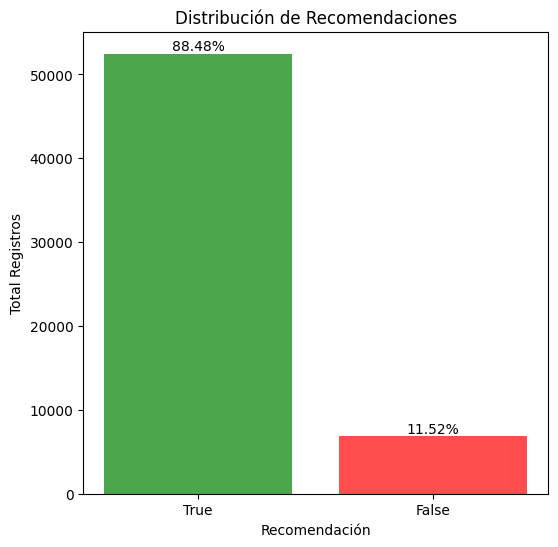

In [33]:
# Crear un gráfico de barras para visualizar las recomendaciones
plt.figure(figsize=(6, 6))

# Crear el gráfico de barras
bars = plt.bar(recomendaciones_final.index.astype(str), recomendaciones_final['Conteo'], color=['green', 'red'], alpha=0.7)

# Agregar etiquetas con el porcentaje a cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 5, f'{height / len(user_reviews) * 100:.2f}%', ha='center', va='bottom')

# Configurar título y ejes
plt.title('Distribución de Recomendaciones')
plt.xlabel('Recomendación')
plt.ylabel('Total Registros')

# Mostrar el gráfico
plt.show()

Vemos un importante desbalance en las recomendaciones positivas y negativas, lo que puede traer problemas para el modelo de recomendación. Puede tener una tendencia a recomendar elementos que tiene mayor cantidad de recomendaciones y que elementos menos populares sean pasados por alto.

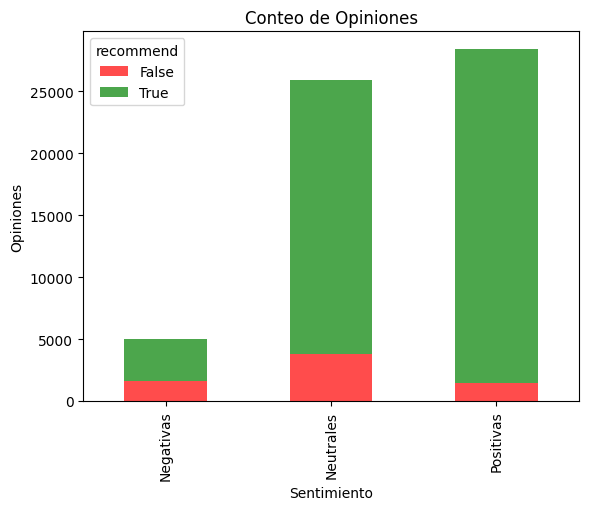

In [54]:
# Crear un DataFrame con las columnas relevantes
df_plot = user_reviews[['sentiment_analysis', 'recommend']]

# Contar el número de opiniones por sentimiento y recomendación
counts = df_plot.groupby(['sentiment_analysis', 'recommend']).size().unstack(fill_value=0)

# Crear el gráfico de barras apiladas
counts.plot(kind='bar', stacked=True, color=['red', 'green'], alpha=0.7)

# Configurar título y etiquetas de los ejes
plt.title('Conteo de Opiniones')
plt.xlabel('Sentimiento')
plt.ylabel('Opiniones')
plt.xticks(ticks=[0, 1, 2], labels=['Negativas', 'Neutrales', 'Positivas'])

# Mostrar el gráfico
plt.show()

Observamos un alto porcentaje de recomenaciones en las opiniones positivas y negativas, y en las neutrales tambien un leve crecimiento del porcentaje de no recomendación con respectos a las otras barras, tambien vemos un mayor porcentaje de opiniones positivas que de opiniones negativas. Por lo que podríamos pensar que cuando a los usuarios le agrada el juego se toman el tiempo de recomendar y dar una buena opinion sobre este.

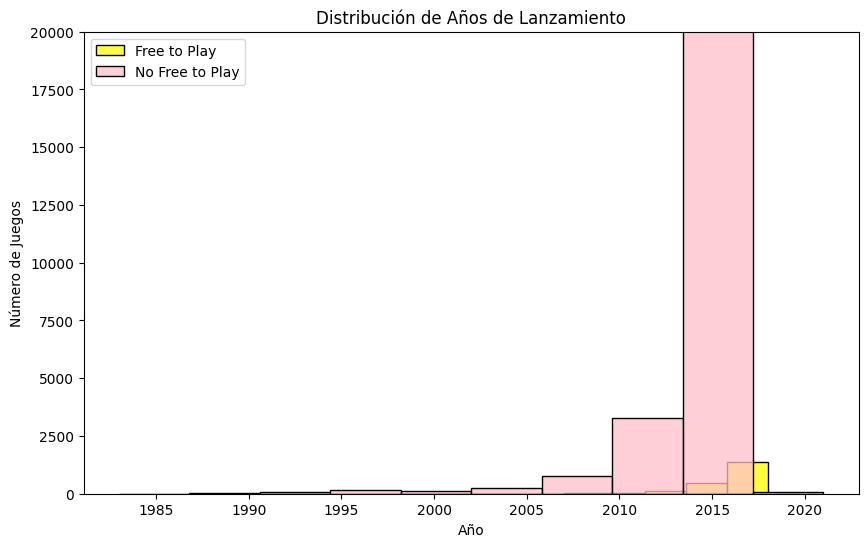

In [45]:
# Filtrar los datos para obtener los juegos "Free to Play" y los que no lo son
free_to_play = steam_games[steam_games['genres'].str.contains("Free to Play")]
not_free_to_play = steam_games[~steam_games['genres'].str.contains("Free to Play")]

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Histograma para juegos Free to Play
sns.histplot(data=free_to_play, x='año', bins=10, color='yellow', label='Free to Play')

# Histograma para juegos que no son Free to Play
sns.histplot(data=not_free_to_play, x='año', bins=10, color='pink', label='No Free to Play')

# Establecer límites del eje y
plt.ylim(0, 20000)

# Configurar título y leyenda
plt.title('Distribución de Años de Lanzamiento')
plt.xlabel('Año')
plt.ylabel('Número de Juegos')
plt.legend()

# Mostrar el gráfico
plt.show()

vemos que para el genero free to play el año 2015 es el año con mayor numeros de lanzamiento de estos juegos

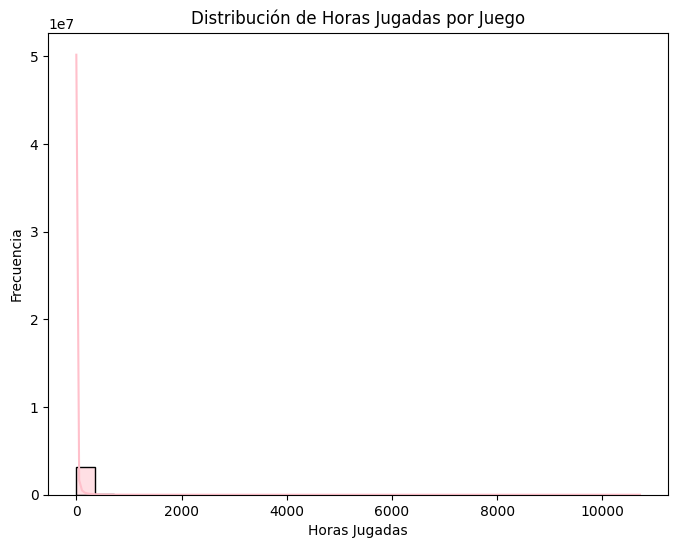

In [61]:
# Visualizar la distribución de las horas jugadas por juego
plt.figure(figsize=(8, 6))
sns.histplot(data=users_items, x='horas', bins=30, kde=True, color='pink')
plt.title('Distribución de Horas Jugadas por Juego')
plt.xlabel('Horas Jugadas')
plt.ylabel('Frecuencia')
plt.show()

Aqui vemos que en el data set existen alguno juegos muy populares para loas horas jugadas y luego mucho juego con no tantas cantidad de horas jugadas. 


Esto nos indica que solo unos pocos juegos con extremadamente populares

In [65]:
# Calcular medidas estadísticas descriptivas
mean_hours = users_items['horas'].mean()
median_hours = users_items['horas'].median()
std_dev_hours = users_items['horas'].std()
quartiles = users_items['horas'].quantile([0.25, 0.5, 0.75])
range_hours = users_items['horas'].max() - users_items['horas'].min()

# Mostrar los resultados
print("Media de horas jugadas:", mean_hours)
print("Mediana de horas jugadas:", median_hours)
print("Desviación estándar de horas jugadas:", std_dev_hours)
print("Cuartiles de horas jugadas:")
print(quartiles)
print("Rango de horas jugadas:", range_hours)


Media de horas jugadas: 25.90567061209296
Mediana de horas jugadas: 3.4166666666666665
Desviación estándar de horas jugadas: 111.95635030081408
Cuartiles de horas jugadas:
0.25     0.733333
0.50     3.416667
0.75    13.466667
Name: horas, dtype: float64
Rango de horas jugadas: 10712.866666666667


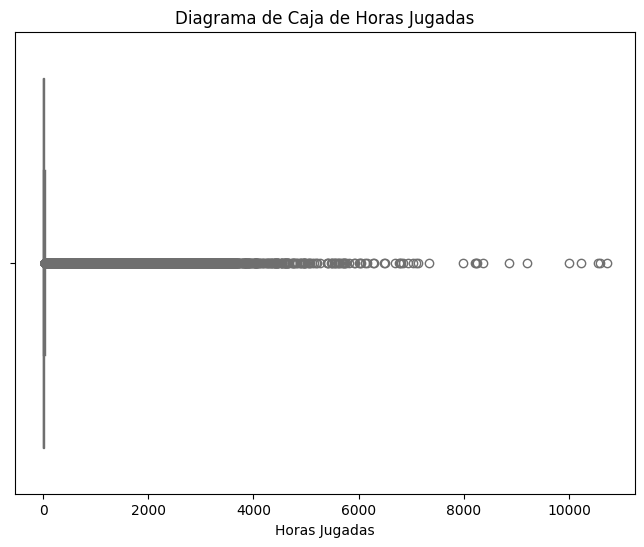

In [67]:
# Crear el diagrama de caja
plt.figure(figsize=(8, 6))
sns.boxplot(x=users_items['horas'], color='skyblue')

# Configurar título y ejes
plt.title('Diagrama de Caja de Horas Jugadas')
plt.xlabel('Horas Jugadas')

# Mostrar el diagrama de caja
plt.show()

Vemos que la columna de horas, la cual repsenta las cantidad de horas jugadas para cada juego cuenta con valores outliers, lo cual puede considerarse que varia porque existen jugadores que dejan la pc prendida en el juego para conseguir más horas de juegos, por lo tanto no haremos un tratamiento sobre esta columna. Solo verificaremos si hay algún juego que tenga algun registro de horas mayor al tiempo de año de lanzamiento que tiene.

In [72]:
# Convertir la columna 'item_id' del dataframe 'steam_games' a tipo 'object'
steam_games['item_id'] = steam_games['item_id'].astype(str)

# Realizar un merge entre los dataframes 'steam_games' y 'user_items_proc' utilizando 'item_id' y 'item_id' respectivamente
games_users = pd.merge(steam_games[['item_id', 'año']], users_items[['item_id', 'horas']],left_on='item_id', right_on='item_id', how='inner')

# Calcular la edad del juego en horas
games_users['age_in_hours'] = (2021 - games_users['año']) * 365 * 24

# Buscar valores erróneos donde las horas jugadas son mayores que la edad del juego en horas
valores_horas_erroneos = games_users[games_users['horas'] > games_users['age_in_hours']]

# Mostrar los valores erróneos
valores_horas_erroneos

,item_id,año,horas,age_in_hours


Como vemos que no existen valor que sobrepasen ese tiempo procedemos a no hacer algun tratamiento sobre esa columna